In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = ['Arial Unicode MS'] 
pd.set_option('display.max_columns', None)
# sns.set_style("darkgrid",{"font.sans-serif":['simhei','Droid Sans Fallback']})

In [2]:
os.chdir('/data')

In [3]:
df = pd.read_csv('air_data.csv')
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,EP_SUM_YR_1,EP_SUM_YR_2,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,WEIGHTED_SEG_KM,LAST_FLIGHT_DATE,AVG_FLIGHT_COUNT,AVG_BP_SUM,BEGIN_TO_FIRST,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,ADD_POINTS_SUM_YR_1,ADD_POINTS_SUM_YR_2,EXCHANGE_COUNT,avg_discount,P1Y_Flight_Count,L1Y_Flight_Count,P1Y_BP_SUM,L1Y_BP_SUM,EP_SUM,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,54993,2006/11/2,2008/12/24,男,6,.,北京,CN,31.0,2014/3/31,210,505308,0,74460,239560.0,234188.0,580717,558440.14,2014/3/31,26.250,63163.500,2,1,3.483254,18,3352,36640,34,0.961639,103,107,246197,259111,74460,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,28065,2007/2/19,2007/8/3,男,6,NaN,北京,CN,42.0,2014/3/31,140,362480,0,41288,171483.0,167434.0,293678,367777.20,2014/3/25,17.500,45310.000,2,7,5.194245,17,0,12000,29,1.252314,68,72,177358,185122,41288,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33
2,55106,2007/2/1,2007/8/30,男,6,.,北京,CN,40.0,2014/3/31,135,351159,0,39711,163618.0,164982.0,283712,355966.50,2014/3/21,16.875,43894.875,10,11,5.298507,18,3491,12000,20,1.254676,65,70,169072,182087,39711,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26
3,21189,2008/8/22,2008/8/23,男,5,Los Angeles,CA,US,64.0,2014/3/31,23,337314,0,34890,116350.0,125500.0,281336,306900.88,2013/12/26,2.875,42164.250,21,97,27.863636,73,0,0,11,1.090870,13,10,186104,151210,34890,0,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12
4,39546,2009/4/10,2009/4/15,男,6,贵阳,贵州,CN,48.0,2014/3/31,152,273844,0,42265,124560.0,130702.0,309928,300834.06,2014/3/27,19.000,34230.500,3,5,4.788079,47,0,22704,27,0.970658,71,81,128448,145396,42265,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39


## 数据探索
### 描述性统计分析
#### 查看整体数据描述性分析

In [4]:
explore = df.describe(percentiles=[], include='all').T
explore

,count,unique,top,freq,mean,std,min,50%,max
MEMBER_NO,62988,NaN,NaN,NaN,31494.5,18183.2,1,31494.5,62988
FFP_DATE,62988,3068,2011/1/13,184,NaN,NaN,NaN,NaN,NaN
FIRST_FLIGHT_DATE,62988,3406,2013/2/16,96,NaN,NaN,NaN,NaN,NaN
GENDER,62985,2,男,48134,NaN,NaN,NaN,NaN,NaN
FFP_TIER,62988,NaN,NaN,NaN,4.10216,0.373856,4,4,6
WORK_CITY,60719,3309,广州,9385,NaN,NaN,NaN,NaN,NaN
WORK_PROVINCE,59740,1183,广东,17507,NaN,NaN,NaN,NaN,NaN
WORK_COUNTRY,62962,118,CN,57748,NaN,NaN,NaN,NaN,NaN
AGE,62568,NaN,NaN,NaN,42.4763,9.88591,6,41,110
LOAD_TIME,62988,1,2014/3/31,62988,NaN,NaN,NaN,NaN,NaN


In [13]:
explore['null'] = len(df) - explore['count']
df_check = explore[['null', 'max', 'min']]
df_check.columns = [['空值记录数', '最大值', '最小值']]
df_check

,空值记录数,最大值,最小值
MEMBER_NO,0,62988,1
FFP_DATE,0,NaN,NaN
FIRST_FLIGHT_DATE,0,NaN,NaN
GENDER,3,NaN,NaN
FFP_TIER,0,6,4
WORK_CITY,2269,NaN,NaN
WORK_PROVINCE,3248,NaN,NaN
WORK_COUNTRY,26,NaN,NaN
AGE,420,110,6
LOAD_TIME,0,NaN,NaN


#### 查看单个主体变量会员逐年增长情况

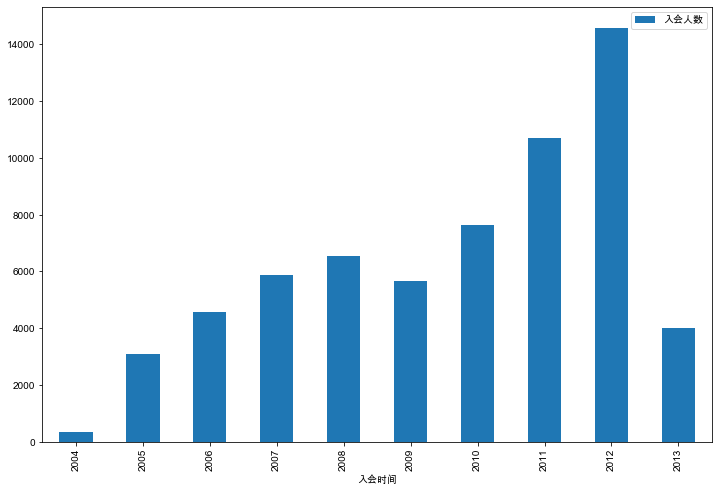

In [5]:
df['FFP_DATE_year'] = pd.to_datetime(df['FFP_DATE']).dt.year

# 获取每个年份的合计数量。方式一
count = df['FFP_DATE_year'].value_counts(sort=False).reset_index()

# 获取每个年份的合计数量。方式二
# count = df.groupby('FFP_DATE')['FFP_DATE'].count()

count.columns = ['入会时间', '入会人数']
count.plot(kind='bar', x='入会时间', y='入会人数', figsize=(12,8))

#### 查看单个分类型变量比例变化情况（直方堆积图）

In [10]:
# 使用数据交叉表，计算每个年度时间节点，出现男女分类的数量情况
cross_table = pd.crosstab(index=df['FFP_DATE_year'],columns=df['GENDER'])
cross_table

GENDER,女,男
FFP_DATE_year,,
2004,51,284
2005,494,2584
2006,867,3688
2007,1151,4714
2008,1373,5183
2009,1173,4479
2010,1888,5760
2011,2733,7974
2012,3982,10615


In [11]:
# 通过div函数，让分组每行合计等于1，用来看每个分组占比
cross_table = cross_table.div(cross_table.sum(1), axis=0)
cross_table

GENDER,女,男
FFP_DATE_year,,
2004,0.152239,0.847761
2005,0.160494,0.839506
2006,0.190340,0.809660
2007,0.196249,0.803751
2008,0.209426,0.790574
2009,0.207537,0.792463
2010,0.246862,0.753138
2011,0.255254,0.744746
2012,0.272796,0.727204


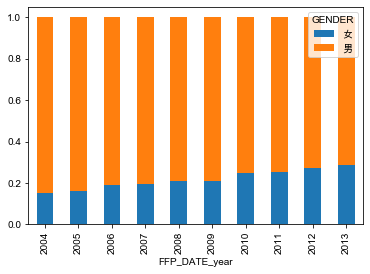

In [12]:
cross_table.plot(kind='bar', stacked=True)

#### 查看单个分类型变量占比情况（直方图&饼图）

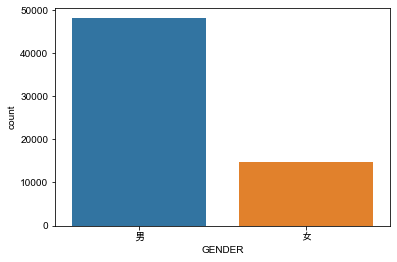

In [13]:
# 男女分别数量合计占比
sns.countplot(x='GENDER',data=df)

<function matplotlib.pyplot.show(*args, **kw)>

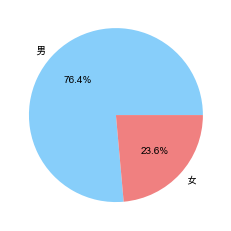

In [14]:
# 男女会员分别所有数量。方式一
# male_count = df.groupby('GENDER')['GENDER'].count()[0]
# female_count = df.groupby('GENDER')['GENDER'].count()[1]

# 方式二
male_count = pd.value_counts(df['GENDER'])['男']
female_count = pd.value_counts(df['GENDER'])['女']

plt.pie([male_count, female_count], 
        labels=['男', '女'], 
        colors=['lightskyblue', 'lightcoral'],
        autopct='%1.1f%%',
       )
plt.show

#### 查看单个分类型变量频数情况（直方图）

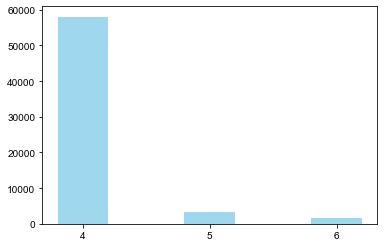

In [15]:
# 方式一： 直接使用sns.countplot 查看单个变量的分类情况
# sns.countplot(x='FFP_TIER',data=df)

# 方式二：
FFP_TIER_Level4 = pd.value_counts(df['FFP_TIER'])[4]
FFP_TIER_Level5 = pd.value_counts(df['FFP_TIER'])[5]
FFP_TIER_Level6 = pd.value_counts(df['FFP_TIER'])[6]

plt.bar(x=range(3), 
        height=[FFP_TIER_Level4, FFP_TIER_Level5, FFP_TIER_Level6],
        width=0.4,
        alpha=0.8,
        color='skyblue')
plt.xticks([index for index in range(3)], [4, 5, 6])
plt.show()

####  查看单个数值型变量分布情况（箱型图）

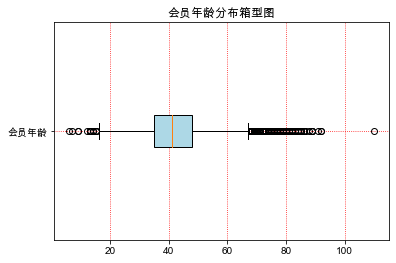

In [16]:
# 会员年龄分布箱型图

plt.figaspect
plt.boxplot(df['AGE'].dropna(),
           patch_artist=True,
           vert=False,
           boxprops = {'facecolor': 'lightblue'},
           labels=['会员年龄'])
plt.grid(linestyle=":", color="r")
plt.title('会员年龄分布箱型图')
plt.show()

### 相关性分析

In [17]:
# 'FFP_TIER','FLIGHT_COUNT','LAST_TO_END','SEG_KM_SUM','EXCHANGE_COUNT','Points_Sum','FFP_DATE'的相关系数分析
df_corr = df.loc[:, ['FFP_TIER','FLIGHT_COUNT','LAST_TO_END','SEG_KM_SUM','EXCHANGE_COUNT','Points_Sum','FFP_DATE']]
age1 = df['AGE'].fillna(0)
df_corr['AGE'] = age1.astype('int64')

# df的相关系数
df_corr = df_corr.corr()
df_corr

,FFP_TIER,FLIGHT_COUNT,LAST_TO_END,SEG_KM_SUM,EXCHANGE_COUNT,Points_Sum,AGE
FFP_TIER,1.000000,0.582447,-0.206313,0.522350,0.342355,0.559249,0.076245
FLIGHT_COUNT,0.582447,1.000000,-0.404999,0.850411,0.502501,0.747092,0.075309
LAST_TO_END,-0.206313,-0.404999,1.000000,-0.369509,-0.169717,-0.292027,-0.027654
SEG_KM_SUM,0.522350,0.850411,-0.369509,1.000000,0.507819,0.853014,0.087285
EXCHANGE_COUNT,0.342355,0.502501,-0.169717,0.507819,1.000000,0.578581,0.032760
Points_Sum,0.559249,0.747092,-0.292027,0.853014,0.578581,1.000000,0.074887
AGE,0.076245,0.075309,-0.027654,0.087285,0.032760,0.074887,1.000000


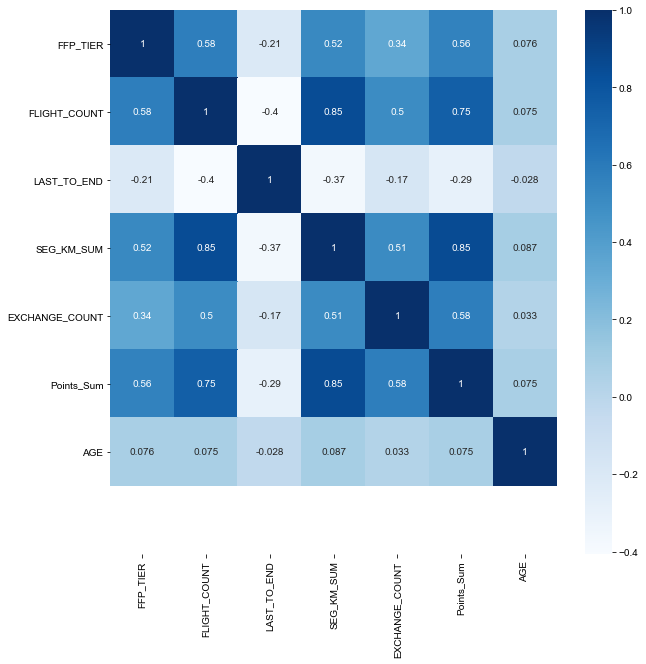

In [18]:
# 设置图形大小
plt.subplots(figsize=(10,10))

# 特征数据热力图
ax = sns.heatmap(df_corr, annot=True, cmap='Blues')
ax.set_ylim([8, 0])
ax

## 数据预处理
### 数据清洗

In [19]:
# 去除票价为空的行　
airline_notnull = df.loc[df['SUM_YR_1'].notnull() & df['SUM_YR_2'].notnull(), :]

# 保留票价非零数据，或者平均折扣率不为零且总飞行数大于0的记录；AGE去除大于100的记录
index1 = airline_notnull['SUM_YR_1'] != 0
index2 = airline_notnull['SUM_YR_2'] != 0
index3 = (airline_notnull['SEG_KM_SUM'] > 0) & (airline_notnull['avg_discount'] != 0)
index4 = airline_notnull['AGE'] > 100
airline = airline_notnull[(index1 | index2) & index3 & ~index4]
airline.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,EP_SUM_YR_1,EP_SUM_YR_2,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,WEIGHTED_SEG_KM,LAST_FLIGHT_DATE,AVG_FLIGHT_COUNT,AVG_BP_SUM,BEGIN_TO_FIRST,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,ADD_POINTS_SUM_YR_1,ADD_POINTS_SUM_YR_2,EXCHANGE_COUNT,avg_discount,P1Y_Flight_Count,L1Y_Flight_Count,P1Y_BP_SUM,L1Y_BP_SUM,EP_SUM,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight,FFP_DATE_year
0,54993,2006/11/2,2008/12/24,男,6,.,北京,CN,31.0,2014/3/31,210,505308,0,74460,239560.0,234188.0,580717,558440.14,2014/3/31,26.250,63163.500,2,1,3.483254,18,3352,36640,34,0.961639,103,107,246197,259111,74460,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50,2006
1,28065,2007/2/19,2007/8/3,男,6,NaN,北京,CN,42.0,2014/3/31,140,362480,0,41288,171483.0,167434.0,293678,367777.20,2014/3/25,17.500,45310.000,2,7,5.194245,17,0,12000,29,1.252314,68,72,177358,185122,41288,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33,2007
2,55106,2007/2/1,2007/8/30,男,6,.,北京,CN,40.0,2014/3/31,135,351159,0,39711,163618.0,164982.0,283712,355966.50,2014/3/21,16.875,43894.875,10,11,5.298507,18,3491,12000,20,1.254676,65,70,169072,182087,39711,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26,2007
3,21189,2008/8/22,2008/8/23,男,5,Los Angeles,CA,US,64.0,2014/3/31,23,337314,0,34890,116350.0,125500.0,281336,306900.88,2013/12/26,2.875,42164.250,21,97,27.863636,73,0,0,11,1.090870,13,10,186104,151210,34890,0,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12,2008
4,39546,2009/4/10,2009/4/15,男,6,贵阳,贵州,CN,48.0,2014/3/31,152,273844,0,42265,124560.0,130702.0,309928,300834.06,2014/3/27,19.000,34230.500,3,5,4.788079,47,0,22704,27,0.970658,71,81,128448,145396,42265,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39,2009


### 属性归约

In [20]:
airline = airline[['FFP_DATE', 'LOAD_TIME', 'LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount' ]]
airline['FFP_DATE'], airline['LOAD_TIME'] = pd.to_datetime(airline['FFP_DATE']), pd.to_datetime(airline['LOAD_TIME'])
airline['L'] = (airline['LOAD_TIME'] - airline['FFP_DATE']).dt.days
airline = airline.drop(['FFP_DATE', 'LOAD_TIME'], axis=1)
airline.columns = ['R', 'F', 'M', 'C', 'L']
airline.head()

,R,F,M,C,L
0,1,210,580717,0.961639,2706
1,7,140,293678,1.252314,2597
2,11,135,283712,1.254676,2615
3,97,23,281336,1.090870,2047
4,5,152,309928,0.970658,1816


### 数据标准化

In [21]:
from sklearn.preprocessing import StandardScaler
data = StandardScaler().fit_transform(airline)
data[:5, :]

array([[-0.94493902, 14.03402401, 26.76115699,  1.29554188,  1.43579256],
       [-0.91188564,  9.07321595, 13.12686436,  2.86817777,  1.30723219],
       [-0.88985006,  8.71887252, 12.65348144,  2.88095186,  1.32846234],
       [-0.41608504,  0.78157962, 12.54062193,  1.99471546,  0.65853304],
       [-0.92290343,  9.92364019, 13.89873597,  1.34433641,  0.3860794 ]])

## 聚类分析

In [22]:
from sklearn.cluster import KMeans

# 构建模型,随机种子设为123
kmeans_model = KMeans(n_clusters=5, n_jobs=4, random_state=123)

# 模型训练
fit_kmeans = kmeans_model.fit(data)

# 查看聚类结果
kmeans_cc = kmeans_model.cluster_centers_
kmeans_cc

# 样本的类别标签
kmeans_lable = kmeans_model.labels_

# 统计不同类别样本数目
pd.Series(kmeans_model.labels_).value_counts()

cluster_center = pd.DataFrame(kmeans_model.cluster_centers_, columns=['ZR','ZF','ZM','ZC','ZL'])
# cluster_center.index = pd.DataFrame(kmeans_model.labels_).drop_duplicates().iloc[:,0]
cluster_center

,ZR,ZF,ZM,ZC,ZL
0,-0.377441,-0.086631,-0.094541,-0.156700,1.160884
1,-0.001833,-0.230222,-0.234605,2.178264,0.046467
2,-0.415181,-0.160853,-0.160603,-0.256563,-0.700401
3,-0.799390,2.483172,2.424457,0.309240,0.483709
4,1.686395,-0.573899,-0.536736,-0.175094,-0.313194


## 聚类分析可视化（雷达图）

findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.


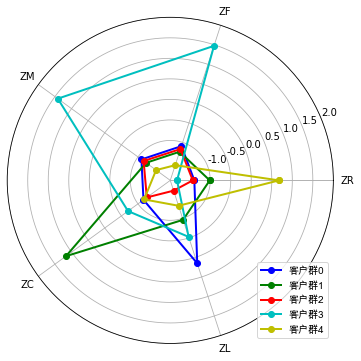

In [23]:
#标签
labels = cluster_center.columns 

#数据个数
k = 5 
plot_data = kmeans_model.cluster_centers_

#指定颜色
color = ['b', 'g', 'r', 'c', 'y'] 

angles = np.linspace(0, 2*np.pi, k, endpoint=False)

# 闭合
plot_data = np.concatenate((plot_data, plot_data[:,[0]]), axis=1) 

# 闭合
angles = np.concatenate((angles, [angles[0]])) 

fig = plt.figure(figsize=(8,6))

#polar参数
ax = fig.add_subplot(111, polar=True) 
for i in range(len(plot_data)):
  ax.plot(angles, plot_data[i], 'o-', color = color[i], label = u'客户群'+str(i), linewidth=2)# 画线

ax.set_rgrids(np.arange(0.01, 3.5, 0.5), np.arange(-1, 2.5, 0.5), fontproperties="SimHei")
ax.set_thetagrids(angles * 180/np.pi, labels, fontproperties="SimHei")
plt.legend(loc = 4)
plt.show()